In [70]:
import sys
sys.path.append('../../../')
import helper

import numpy as np
import matplotlib.pyplot as plt

In [71]:
results = helper.get_filenames_results()
for key in results:
    print(helper.get_params_results(key))

{'dataset_name': '1', 'method': 'gauss-newton', 'init_dist_x': 50, 'init_dist_y': 0, 'init_density_x': 10001, 'init_density_y': 1}
{'dataset_name': '1', 'method': 'gauss-newton', 'init_dist_x': 0, 'init_dist_y': 50, 'init_density_x': 1, 'init_density_y': 10001}
{'dataset_name': '1', 'method': 'gauss-newton', 'init_dist_x': 10, 'init_dist_y': 0, 'init_density_x': 10001, 'init_density_y': 1}
{'dataset_name': '1', 'method': 'gauss-newton', 'init_dist_x': 0, 'init_dist_y': 10, 'init_density_x': 1, 'init_density_y': 10001}


In [72]:
def print_results_one_line(results_list, labels_list, axis=0):
    for i in range(len(results_list)):
        plt.plot(results_list[i][:, axis], results_list[i][:, 2], label=labels_list[i])
    plt.xlabel(f'init point axis={axis}')
    plt.ylabel('Steps')
    plt.title('Research starting point')
    plt.grid(True)
    plt.legend()
    plt.show()

In [73]:
def get_and_print_result(name_lists, axis):
    results_list = []
    labels_list = []
    for name in name_lists:
        research = helper.load_matrix(results[name])
        results_list = [research]
        labels_list = [helper.get_params_results(name)['method']]

    print_results_one_line(results_list, labels_list, axis=axis)

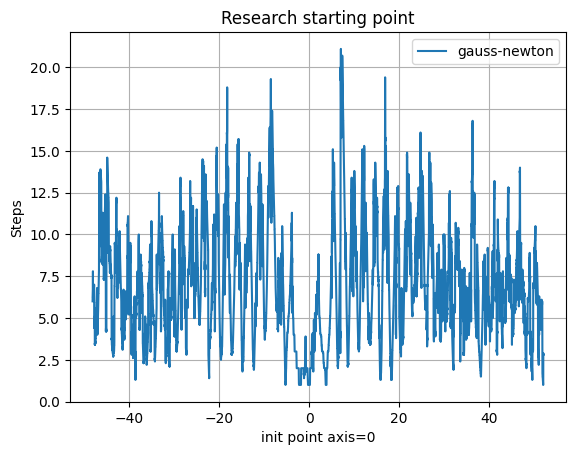

In [74]:
get_and_print_result(['1'], 0)

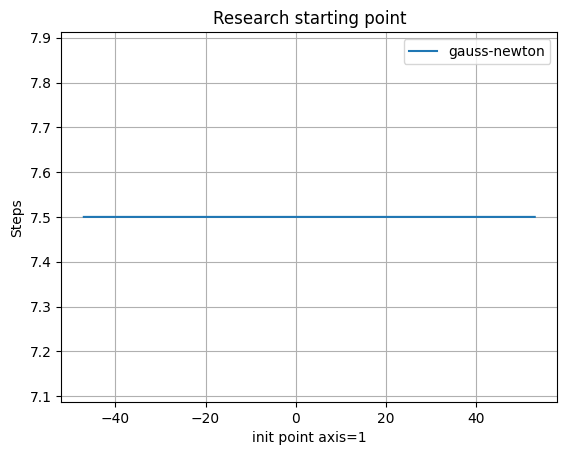

In [75]:
get_and_print_result(['2'], 1)

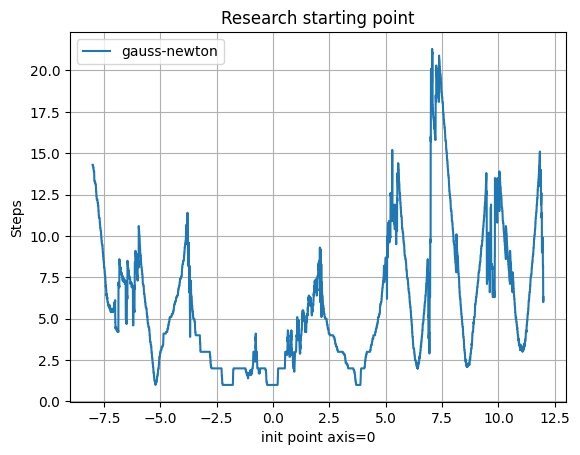

In [76]:
get_and_print_result(['3'], 0)

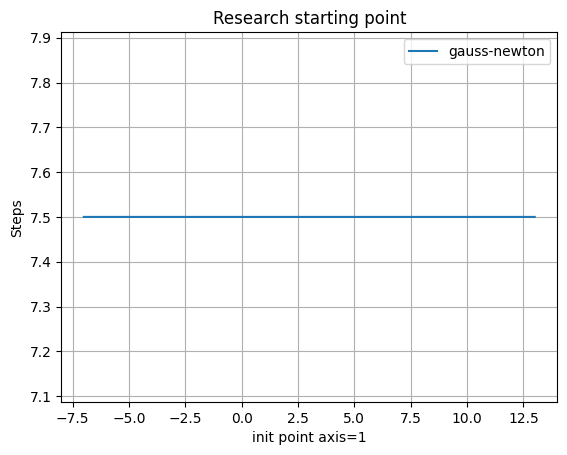

In [78]:
get_and_print_result(['4'], 1)